In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
pk = pd.read_csv("./pokemon.csv")
pk.head()


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [18]:
pk.info()
pk.shape

# seems like 405 out of 807 Pokemon only have one type and type_2 is null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


(807, 14)

In [41]:
pk.duplicated().sum()

0

In [38]:
pk.nunique()

id                 807
species            807
generation_id        7
height              52
weight             422
base_experience    157
type_1              18
type_2              18
hp                  98
attack             107
defense            106
speed              110
special-attack     103
special-defense     95
dtype: int64

In [20]:
# cast species, type_1, type_2 into categorical varibles

pk["species"] = pk["species"].astype('category')
pk["type_1"] = pk["type_1"].astype('category')
pk["type_2"] = pk["type_2"].astype('category')

pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               807 non-null    int64   
 1   species          807 non-null    category
 2   generation_id    807 non-null    int64   
 3   height           807 non-null    float64 
 4   weight           807 non-null    float64 
 5   base_experience  807 non-null    int64   
 6   type_1           807 non-null    category
 7   type_2           405 non-null    category
 8   hp               807 non-null    int64   
 9   attack           807 non-null    int64   
 10  defense          807 non-null    int64   
 11  speed            807 non-null    int64   
 12  special-attack   807 non-null    int64   
 13  special-defense  807 non-null    int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 112.6 KB


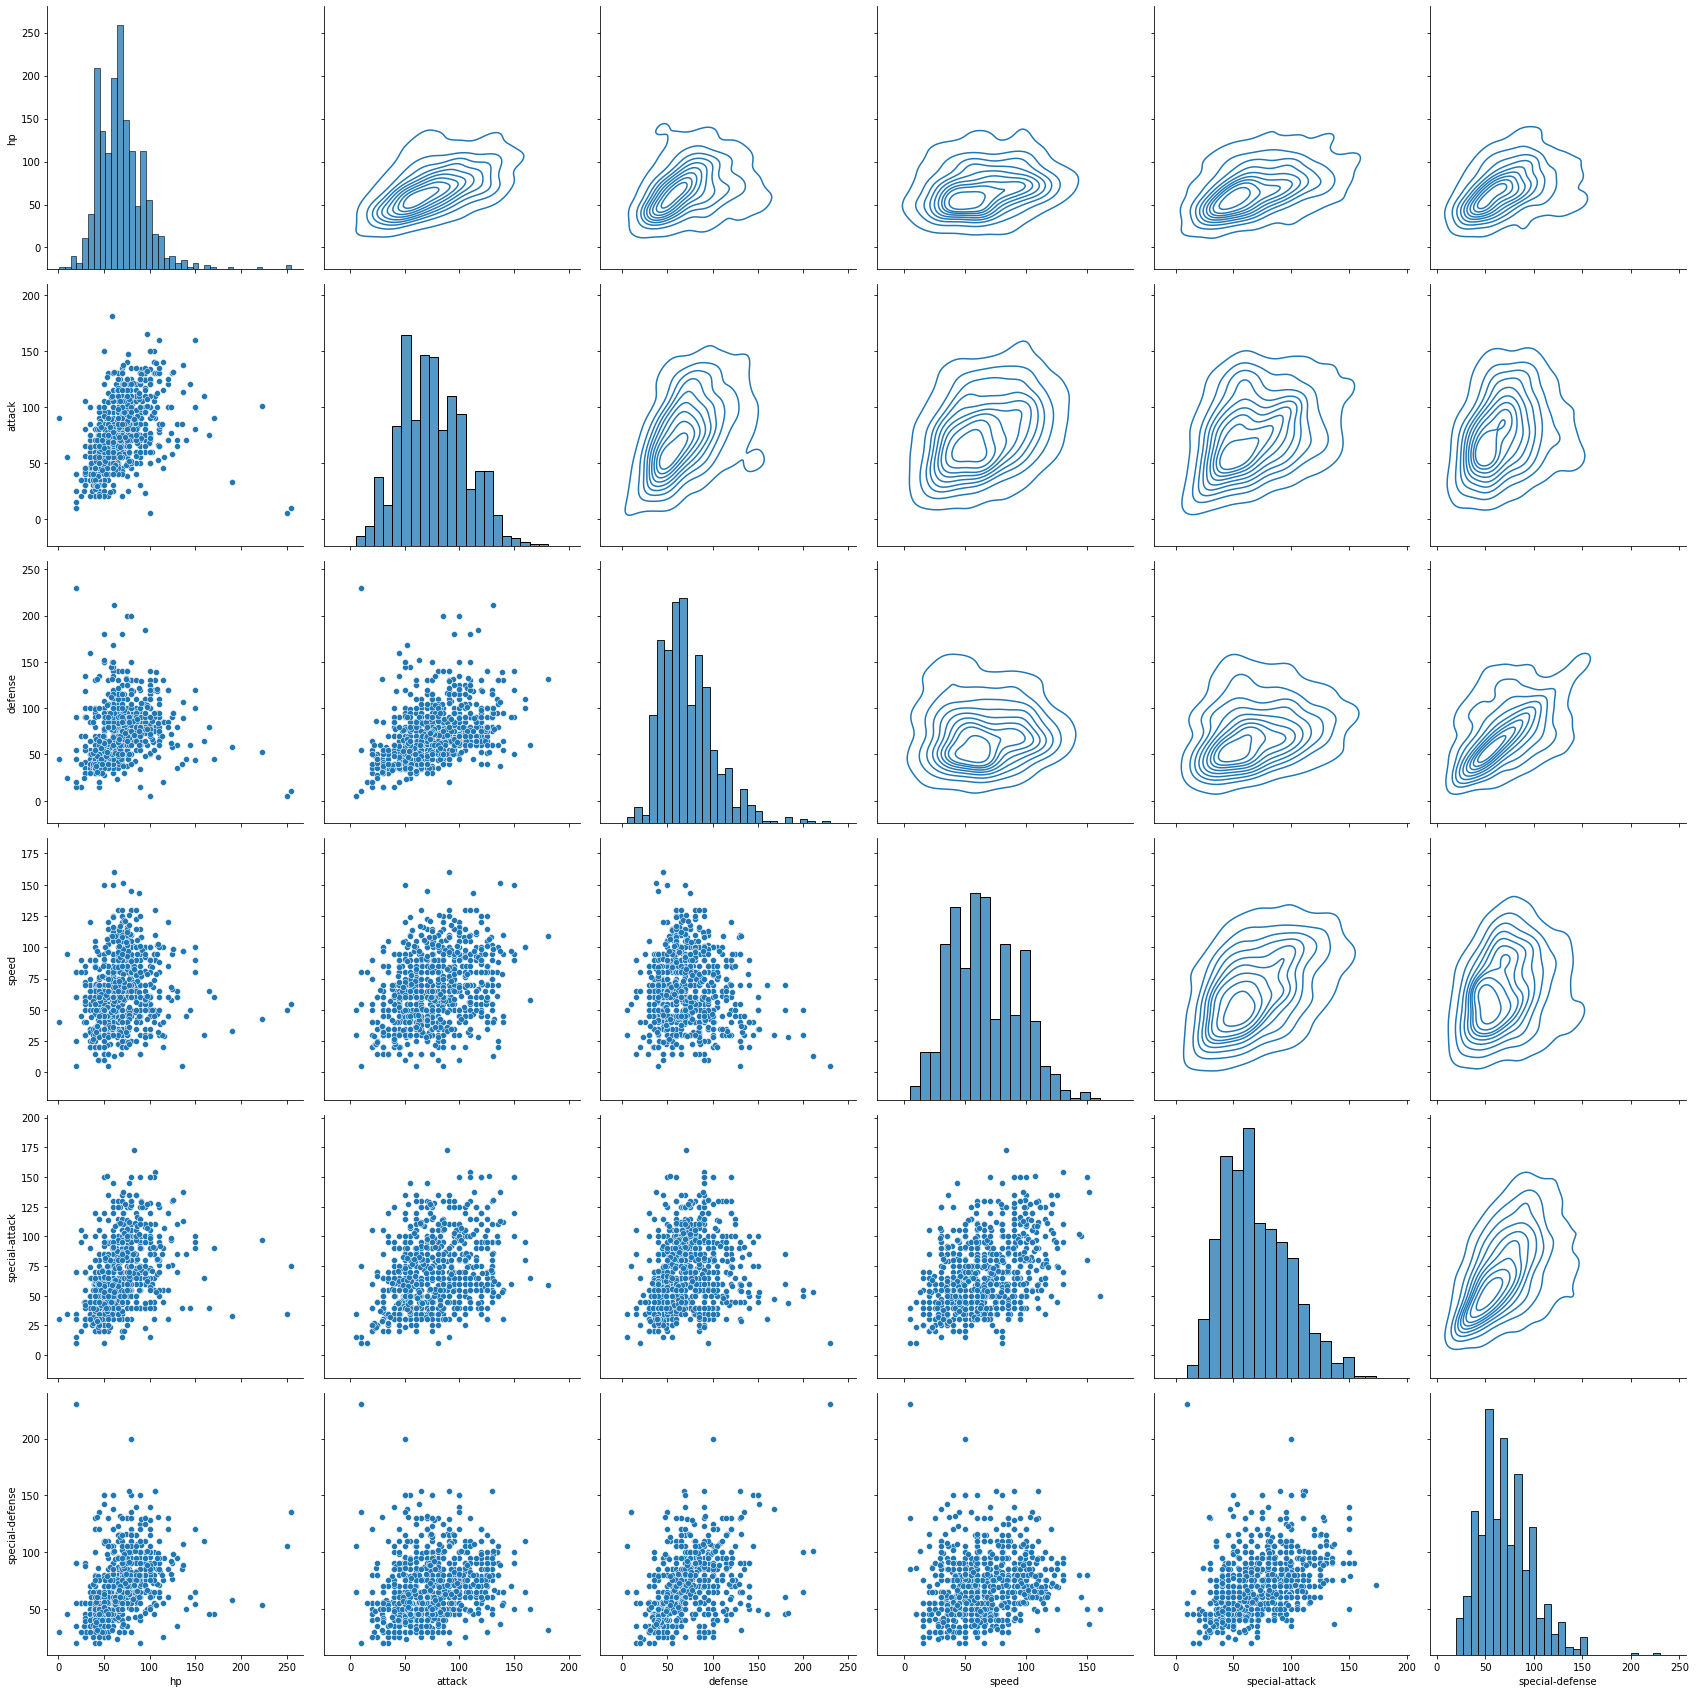

In [23]:
g = sns.PairGrid(data = pk, 
                vars = ['hp','attack','defense','speed','special-attack','special-defense'],
                height = 4)
                
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

lets see if there is relationship between defense, special-defence and speed 

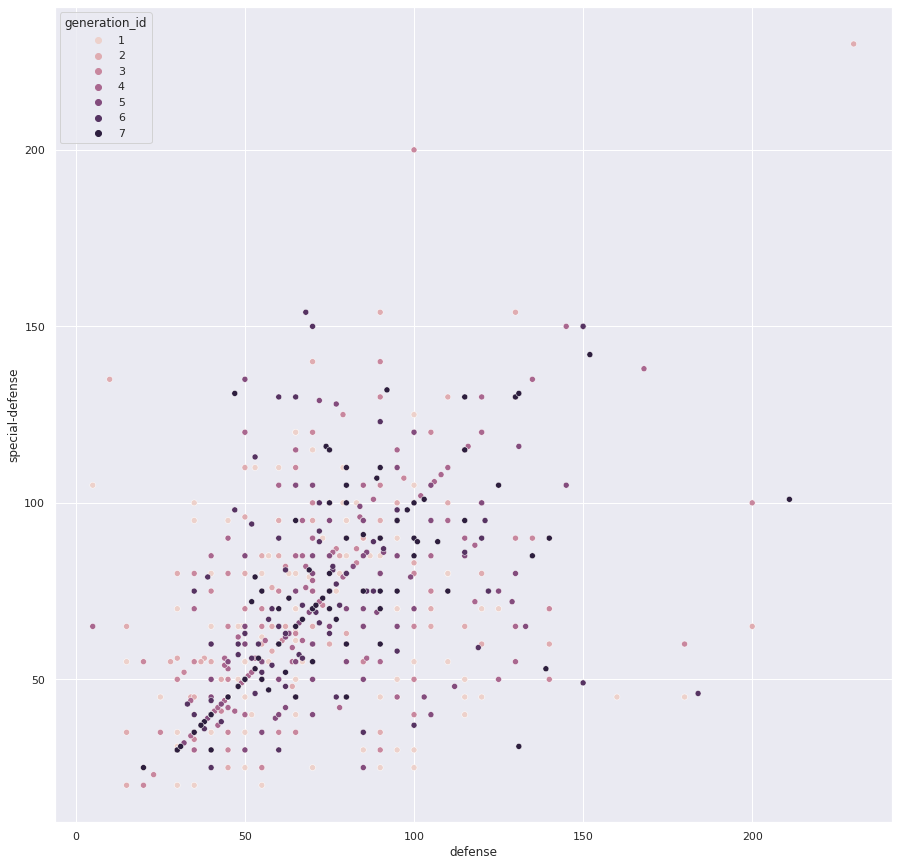

In [43]:
sns.set(rc={"figure.figsize":(15, 15)}) 
g = sns.scatterplot(data = pk, x = 'defense', y = 'special-defense', hue = 'generation_id' )